In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PurchaseFrequency': [5, 2, 8, 1, 4, 3, 6, 7, 2, 5],
    'AmountSpent': [200, 150, 500, 50, 300, 100, 400, 450, 80, 250],
    'ProductTypes': [3, 2, 5, 1, 4, 2, 3, 5, 1, 4]
}

In [4]:
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

Original Dataset:
   CustomerID  PurchaseFrequency  AmountSpent  ProductTypes
0           1                  5          200             3
1           2                  2          150             2
2           3                  8          500             5
3           4                  1           50             1
4           5                  4          300             4
5           6                  3          100             2
6           7                  6          400             3
7           8                  7          450             5
8           9                  2           80             1
9          10                  5          250             4


In [5]:
scaler = StandardScaler()
df[['PurchaseFrequency', 'AmountSpent', 'ProductTypes']] = scaler.fit_transform(df[['PurchaseFrequency', 'AmountSpent', 'ProductTypes']])


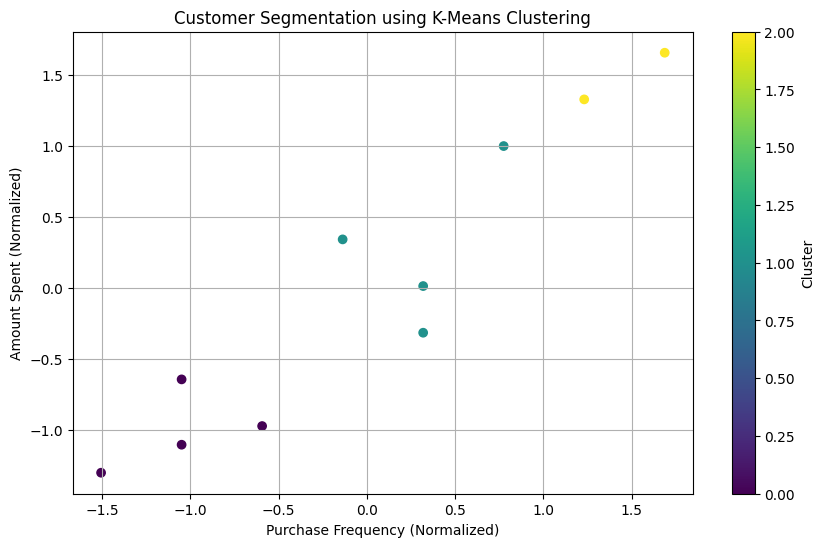

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['PurchaseFrequency', 'AmountSpent', 'ProductTypes']])

plt.figure(figsize=(10, 6))
plt.scatter(df['PurchaseFrequency'], df['AmountSpent'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Purchase Frequency (Normalized)')
plt.ylabel('Amount Spent (Normalized)')
plt.title('Customer Segmentation using K-Means Clustering')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [7]:
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(df[['PurchaseFrequency', 'AmountSpent', 'ProductTypes']], df['Cluster'])

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')
print("\nFinal DataFrame with Cluster Assignments:")
print(df)

Inertia: 3.1641557073351674
Silhouette Score: 0.5736367326930072

Final DataFrame with Cluster Assignments:
   CustomerID  PurchaseFrequency  AmountSpent  ProductTypes  Cluster
0           1           0.319173    -0.315571      0.000000        1
1           2          -1.048710    -0.644291     -0.707107        0
2           3           1.687055     1.656748      1.414214        2
3           4          -1.504670    -1.301730     -1.414214        0
4           5          -0.136788     0.341869      0.707107        1
5           6          -0.592749    -0.973011     -0.707107        0
6           7           0.775133     0.999308      0.000000        1
7           8           1.231094     1.328028      1.414214        2
8           9          -1.048710    -1.104499     -1.414214        0
9          10           0.319173     0.013149      0.707107        1
